# House Price Prediction

This dataset contains 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

`
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV- Median value of owner-occupied homes in $1000's
`

In [1]:
import keras;
import numpy as np


Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
min(y_train), max(y_train), np.mean(y_train)
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [2]:
# Building the model
from keras import layers
from keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
k = 4 
num_val_samples = len(x_train) // k 
num_epochs = 100
all_scores = []

In [10]:
all_mae_histories = []
for i in range(k):
    print('processing fold #', i) 
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
                                         x_train[(i + 1) * num_val_samples:]], axis=0) 
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                            y_train[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error'] 
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [11]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


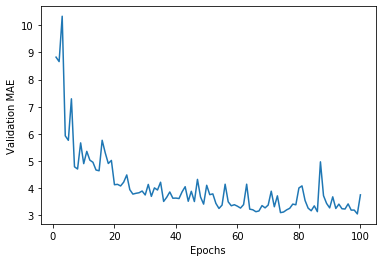

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
model = build_model()
model.fit(x_train, y_train, epochs=500, batch_size=16, verbose=1) 
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 3ms/step


In [21]:
test_mae_score

4.016421458300422

In [22]:
model.save('price_model.h5')

In [5]:
from keras.models import load_model

model = load_model('price_model.h5')

W0922 23:19:24.020618  5416 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 23:19:24.048575  5416 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 23:19:24.148616  5416 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0922 23:19:24.149574  5416 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0922 23:19:24.150573  

In [36]:
value = np.array([x_train[0]])
model.predict(value)

array([[15.792945]], dtype=float32)

In [23]:
result

array([[15.792945 ],
       [32.329983 ],
       [47.345566 ],
       [19.439182 ],
       [17.923067 ],
       [19.170631 ],
       [13.734659 ],
       [14.734161 ],
       [18.087912 ],
       [14.389654 ],
       [15.83267  ],
       [16.986631 ],
       [20.543226 ],
       [18.9774   ],
       [13.683936 ],
       [11.203263 ],
       [52.861958 ],
       [24.462576 ],
       [23.894611 ],
       [22.610846 ],
       [13.281328 ],
       [27.98299  ],
       [30.41022  ],
       [25.634705 ],
       [17.829449 ],
       [13.330971 ],
       [20.512732 ],
       [25.351717 ],
       [15.086026 ],
       [18.653318 ],
       [20.868696 ],
       [16.52767  ],
       [16.053816 ],
       [22.184744 ],
       [31.139471 ],
       [23.42184  ],
       [13.5073805],
       [13.263968 ],
       [21.893538 ],
       [18.639849 ],
       [16.748978 ],
       [23.934713 ],
       [19.30478  ],
       [19.209919 ],
       [13.860002 ],
       [16.089659 ],
       [18.001562 ],
       [17.16